<h1>Graficos de variación de precios</h1>

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Cargar el archivo csv con la base de datos
file_path = "data_car_prices\Armenian_Market_Car_Prices_NEWCOLUMNS.csv" # Ruta al archivo en tu sistema
df = pd.read_csv(file_path)

In [14]:
# Calcula el primer (Q1) y tercer cuartil (Q3)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra el DataFrame para eliminar los outliers
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Imprime el DataFrame filtrado
print(df)

      Year     Region  FuelType  Mileage  Price          Marca  \
0     2002      Goris    Diesel   215000  12000           Ford   
1     2017     Ijevan  Gasoline    72000  11500           Ford   
2     1998    Armavir  Gasoline   466000   4000           Opel   
3     2020   Nor Nork  Gasoline   100000  22000          Mazda   
4     1998    Armavir  Gasoline   318000   3500           Opel   
...    ...        ...       ...      ...    ...            ...   
7981  2013    Armavir  Gasoline   150000  35000            VAZ   
7982  2018   Nor Nork  Gasoline    94000   5600         Toyota   
7983  2001   Ajapnyak  Gasoline   151000   9800           Opel   
7984  2009  Shengavit  Gasoline   300000   4500         Toyota   
7985  1997  Nor Geghi  Gasoline   200000   3200  Mercedes-Benz   

                   Name  
0               Transit  
1                 Focus  
2                Vectra  
3                     6  
4                Vectra  
...                 ...  
7981  (Lada) 2121 (4x4)  

C:\Users\javie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\javie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


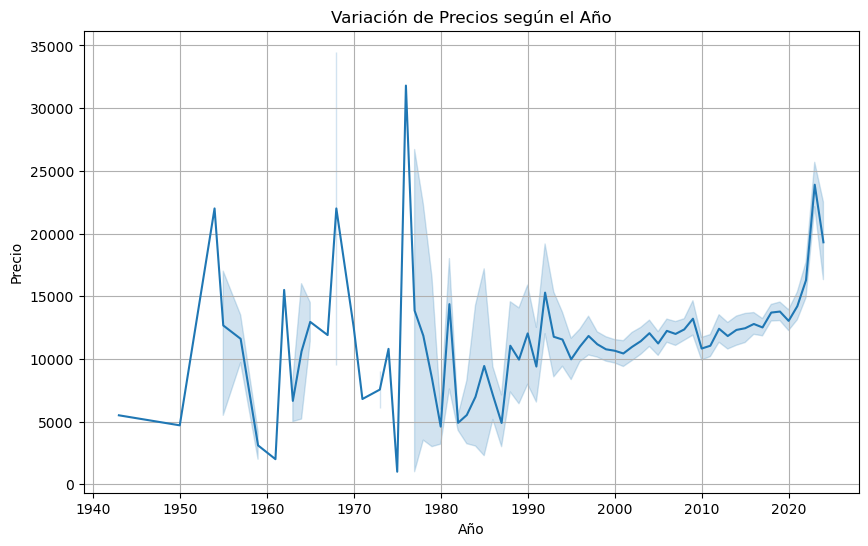

In [15]:
# Variación de precios según el año
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Price')
plt.title('Variación de Precios según el Año')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

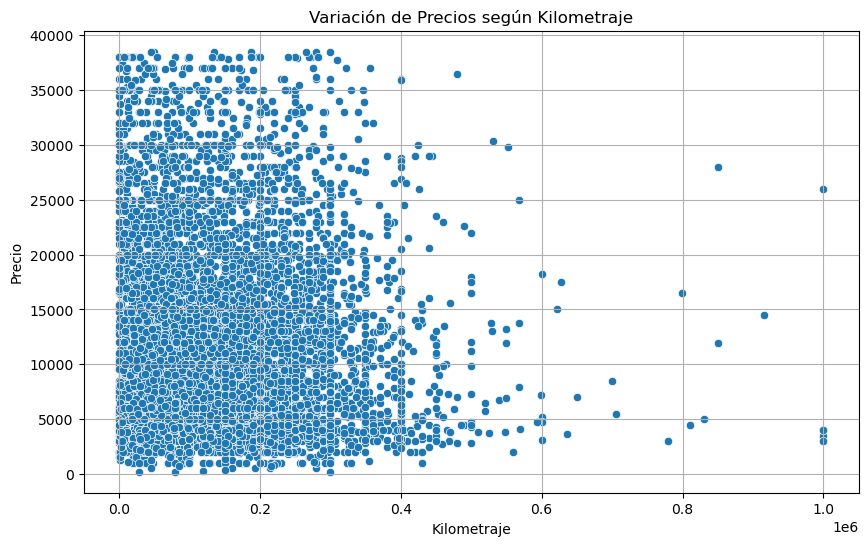

In [16]:
# Variación de precios según el kilometraje
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Mileage', y='Price')
plt.title('Variación de Precios según Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

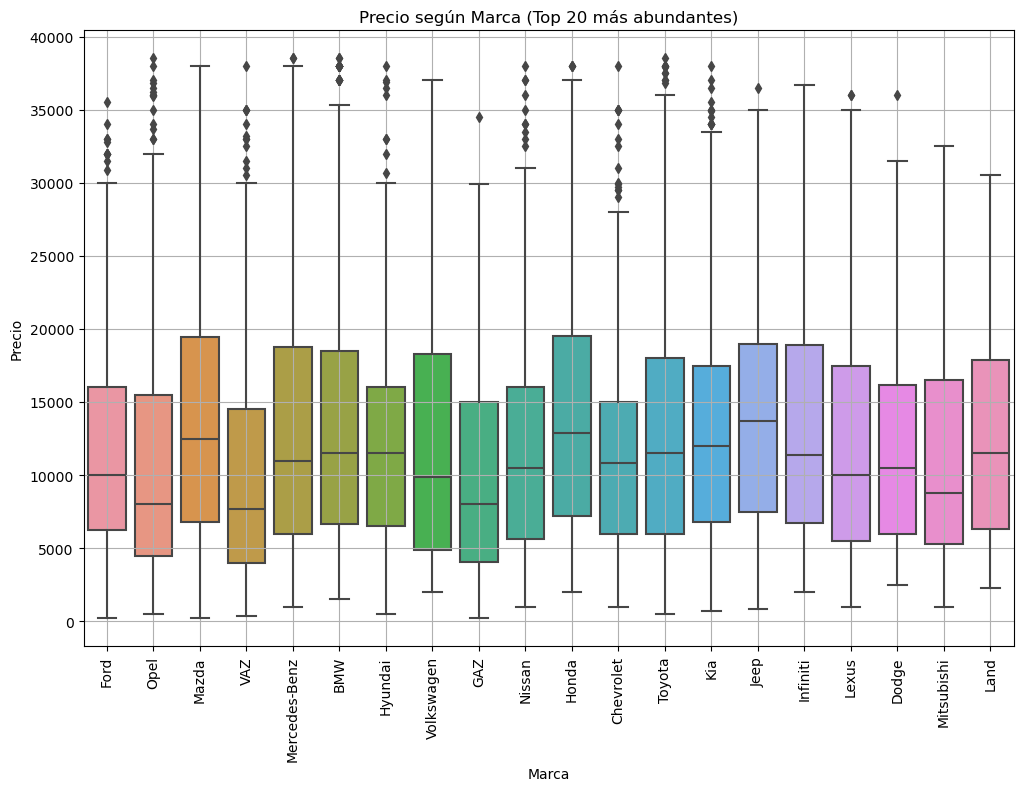

In [17]:
# Precio según la marca (20 marcas más abundantes)
top_20_brands = df['Marca'].value_counts().nlargest(20).index
df_top_20_brands = df[df['Marca'].isin(top_20_brands)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_20_brands, x='Marca', y='Price')
plt.title('Precio según Marca (Top 20 más abundantes)')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.xticks(rotation=90)  # Rotar etiquetas para mejorar la legibilidad
plt.grid(True)
plt.show()

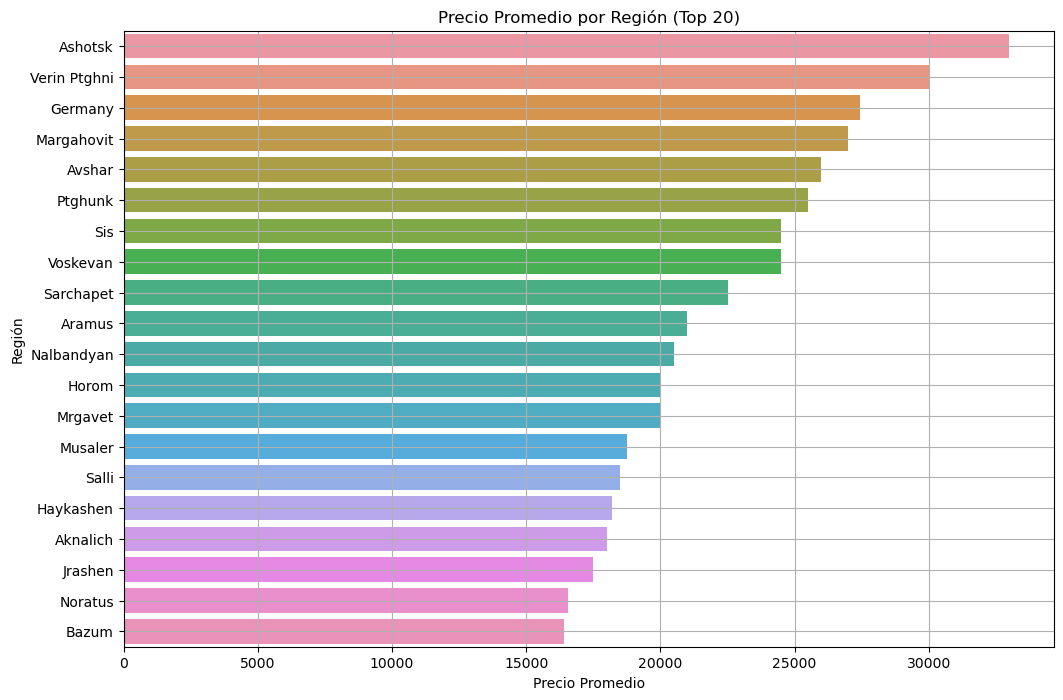

In [18]:
# Regiones con el promedio del precio más alto (Top 20)
top_20_regions = df.groupby('Region')['Price'].mean().nlargest(20).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_regions.values, y=top_20_regions.index, orient='h')
plt.title('Precio Promedio por Región (Top 20)')
plt.xlabel('Precio Promedio')
plt.ylabel('Región')
plt.grid(True)
plt.show()

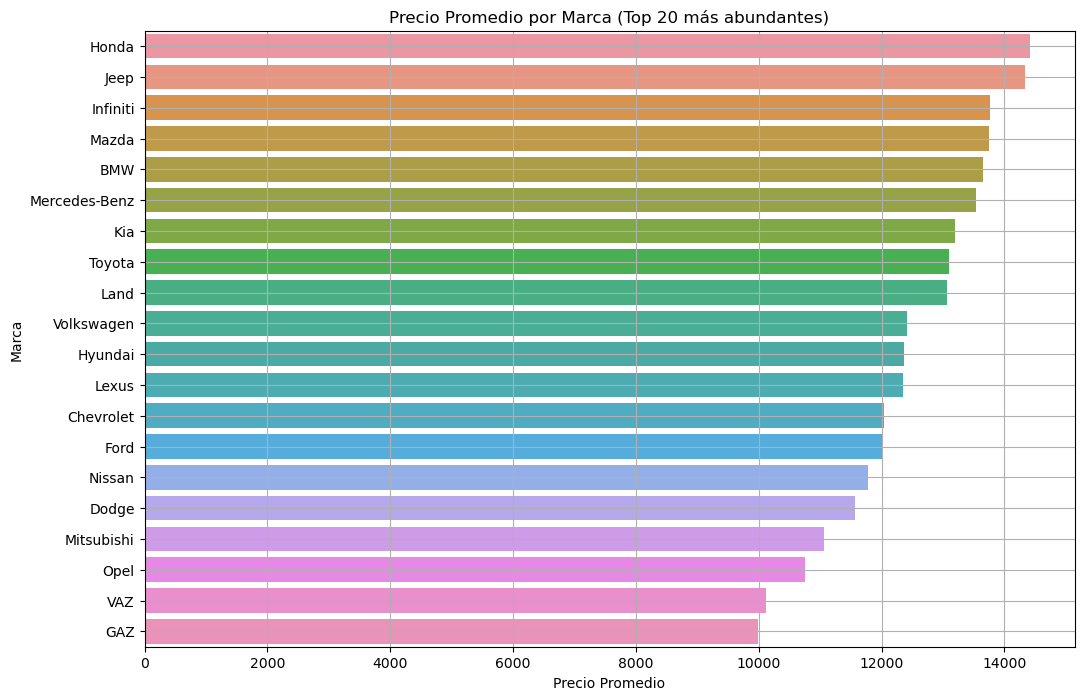

In [19]:
# Precio promedio por marca (Top 20 más abundantes)
top_20_brands = df['Marca'].value_counts().nlargest(20).index
average_price_top_20_brands = df[df['Marca'].isin(top_20_brands)].groupby('Marca')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_top_20_brands.values, y=average_price_top_20_brands.index, orient='h')
plt.title('Precio Promedio por Marca (Top 20 más abundantes)')
plt.xlabel('Precio Promedio')
plt.ylabel('Marca')
plt.grid(True)
plt.show()


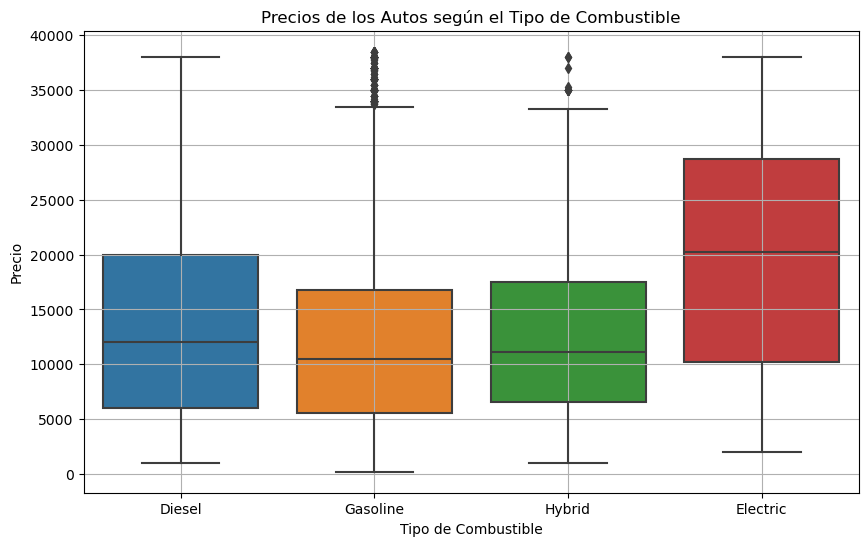

In [20]:
# Comparar precios según FuelType
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FuelType', y='Price')
plt.title('Precios de los Autos según el Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio')
plt.grid(True)
plt.show()


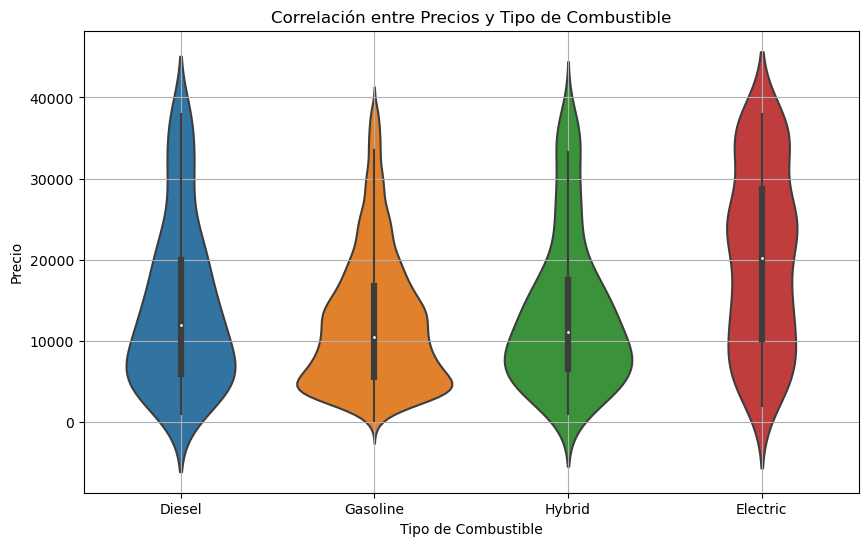

In [21]:
# Correlación entre precios y FuelType
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='FuelType', y='Price')
plt.title('Correlación entre Precios y Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio')
plt.grid(True)
plt.show()
